Importações

In [2]:
import pandas as pd
import random
import numpy as np
import seaborn as sns #BIBLIOTECA PARA VISUALIZAÇÃO DE GRÁFICOS
from sklearn.model_selection import train_test_split #FAZ A AMOSTRA ESTRATIFICADA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
dataset = pd.read_csv('credit_data.csv')   #BASE HISTÓRICA

In [4]:
dataset.shape
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


Apagar os registros em que as idades estão inválidas.

In [5]:
dataset.dropna(inplace=True)

In [6]:
dataset.shape
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


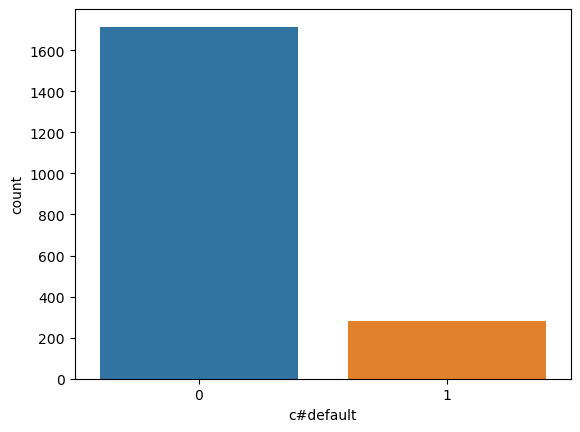

In [7]:
sns.countplot(x=dataset['c#default']);

Definir variável para extrair os atributos (previsores) e outra para extrair a classe (respostas)

In [8]:
X = dataset.iloc[:,1:4].values #Todas as linhas, do 1 até o 4 (não inclui o 4), o .value converte para o formato do numpy, podendo passar para a biblioteca de ML.

In [31]:
X.shape

(1997, 3)

In [9]:
y = dataset.iloc[:,4].values

In [38]:
y.shape

(1997,)

Dividir as porções entre base de treinamento e base de teste (test_size significa o percentual da base de dados que será utilizada para fazer o teste)

In [10]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, stratify = y)

O Stratify mantém a proporção entre as classes, ou seja, nesses 20% da base de teste e 80% da base de treinamento, a proporção classe0/total e classe1/total será a mesma.

In [11]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

In [12]:
X_teste.shape, y_teste.shape

((400, 3), (400,))

Para saber a quantidade exata de cada grupo:

In [44]:
np.unique(y, return_counts = True)

(array([0, 1], dtype=int64), array([1714,  283], dtype=int64))

In [46]:
np.unique(y_treinamento, return_counts = True)

(array([0, 1], dtype=int64), array([1371,  226], dtype=int64))

In [47]:
np.unique(y_teste, return_counts = True)

(array([0, 1], dtype=int64), array([343,  57], dtype=int64))

In [53]:
57/len(y_teste)

0.1425

In [52]:
226/len(y_treinamento)

0.14151534126487164

Criar o modelo/algoritmo Naive Bayes

In [56]:
modelo = GaussianNB()
modelo.fit(X_treinamento, y_treinamento) #.fit encaixa o algoritmo NB nos dados que temos

GaussianNB()

In [57]:
previsoes = modelo.predict(X_teste)

In [58]:
previsoes

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [60]:
y_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [61]:
accuracy_score(previsoes, y_teste)

0.94

In [64]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[336,  17],
       [  7,  40]], dtype=int64)

Forma gráfica de visualizar os erros e acertos (o x representa as previsões e o y os resultados reais)

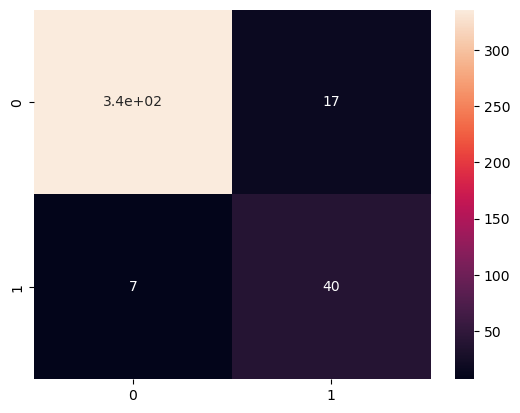

In [66]:
sns.heatmap(cm, annot=True);

Verificar o percentual de acerto para cada classe

Percentual de acerto para pessoas que pagam o emprestimo:

In [67]:
336/(336+17)

0.9518413597733711

Percentual de acerto para pessoas que não pagam o emprestimo:

In [68]:
40/(40+7)

0.851063829787234